In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
    

In [2]:
df=pd.read_csv("customer_churn.csv")
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [3]:
df.shape

(36992, 25)

In [4]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [5]:
df.info()

# data set has 36992 entries and 25 columns
# in which 5 columns are of numeric type and rest are of object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [6]:
# Removing customer_id and joining_data as they are no very important in the data
df.drop(['customer_id'], inplace=True, axis=1)
df.drop(['joining_date'], inplace=True, axis=1)

In [7]:
df.head()

,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,Traci Peery,32,F,5K0N3X1,City,Premium Membership,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,Meghan Kosak,31,F,SVZXCWB,City,No Membership,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [8]:
df.isnull().sum()
# checking null values in columns and found that
# region category has 5428 values null
# prefered offer types has 288 values null
# points in wallet has 3443 values null

Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [9]:
df.columns

Index(['Name', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joined_through_referral', 'referral_id',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'last_visit_time', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score'],
      dtype='object')

# Handling missing values

In [10]:
df.isnull().sum()


Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [11]:
df["internet_option"].value_counts()

Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64

In [12]:
df["churn_risk_score"].value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

In [13]:
df["region_category"].value_counts()

Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64

In [14]:
df["preferred_offer_types"]

0           Gift Vouchers/Coupons
1           Gift Vouchers/Coupons
2           Gift Vouchers/Coupons
3           Gift Vouchers/Coupons
4        Credit/Debit Card Offers
                   ...           
36987    Credit/Debit Card Offers
36988              Without Offers
36989       Gift Vouchers/Coupons
36990       Gift Vouchers/Coupons
36991       Gift Vouchers/Coupons
Name: preferred_offer_types, Length: 36992, dtype: object

In [15]:
df["preferred_offer_types"].value_counts()

Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64

In [16]:
df["points_in_wallet"]

0        781.750000
1               NaN
2        500.690000
3        567.660000
4        663.060000
            ...    
36987    639.510000
36988    527.990000
36989    680.470000
36990    197.264414
36991    719.970000
Name: points_in_wallet, Length: 36992, dtype: float64

In [17]:
rmode=df["region_category"].mode()
pmode=df["preferred_offer_types"].mode()

In [18]:
rmode

0    Town
Name: region_category, dtype: object

In [19]:
pmode

0    Gift Vouchers/Coupons
Name: preferred_offer_types, dtype: object

In [20]:
#df["region_category"]=df["region_category"].fillna(df["region_category"].mode(),inplace=True)
#df["preferred_offer_types"]=df["preferred_offer_types"].fillna(df["preferred_offer_types"].mode(),inplace=True)

#df["region_category"].fillna(rmode,inplace=True)
#df["preferred_offer_types"].fillna(pmode,inplace=True)

from sklearn.impute import SimpleImputer

si=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df[["region_category","preferred_offer_types"]]=si.fit_transform(df[["region_category","preferred_offer_types"]])

In [21]:
df.isnull().sum()

Name                               0
age                                0
gender                             0
security_no                        0
region_category                    0
membership_category                0
joined_through_referral            0
referral_id                        0
preferred_offer_types              0
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [22]:
si=SimpleImputer(missing_values=np.nan,strategy="mean")
df[["points_in_wallet"]]=si.fit_transform(df[["points_in_wallet"]])

In [23]:
df.isnull().sum()

Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [24]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,184.811682,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,624.350000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,686.882199,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,757.002500,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          36992 non-null  object 
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               36992 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   referral_id                   36992 non-null  object 
 8   preferred_offer_types         36992 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

In [26]:
df[["past_complaint","complaint_status"]]

,past_complaint,complaint_status
0,No,Not Applicable
1,Yes,Solved
2,Yes,Solved in Follow-up
3,Yes,Unsolved
4,Yes,Solved
...,...,...
36987,Yes,No Information Available
36988,No,Not Applicable
36989,Yes,Unsolved
36990,No,Not Applicable


In [27]:
df.drop("complaint_status",axis=1,inplace=True)

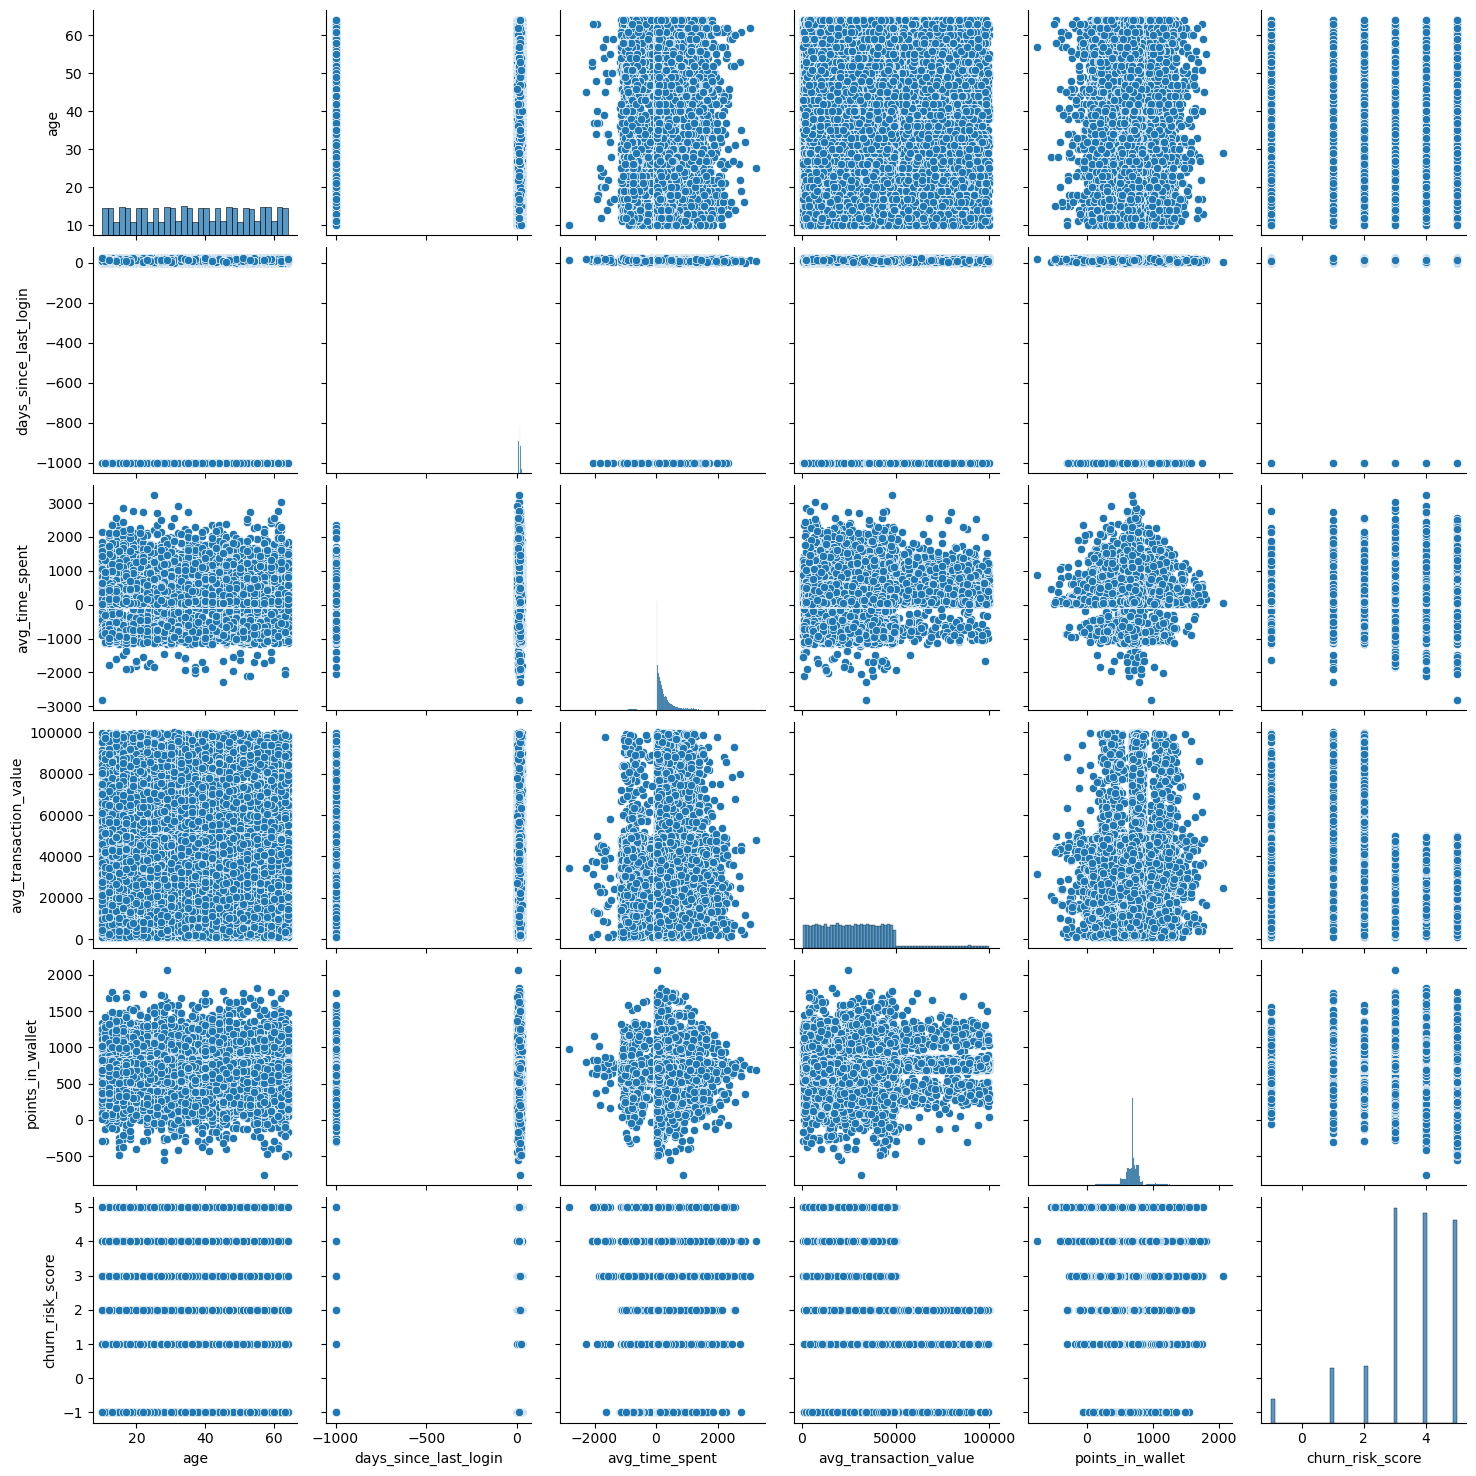

In [28]:
sns.pairplot(df)
plt.show()

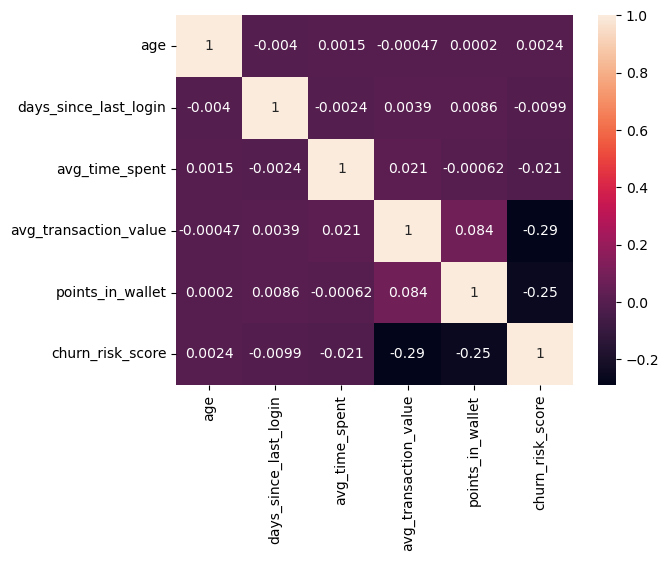

In [29]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [30]:
colnames=df.select_dtypes(["int64","float64"]).columns
colnames

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'points_in_wallet', 'churn_risk_score'],
      dtype='object')

age


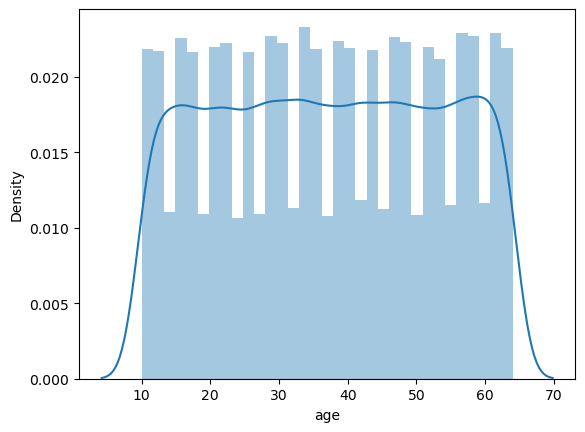

days_since_last_login


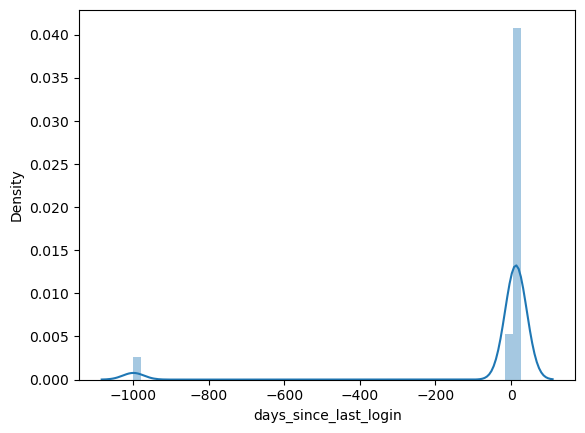

avg_time_spent


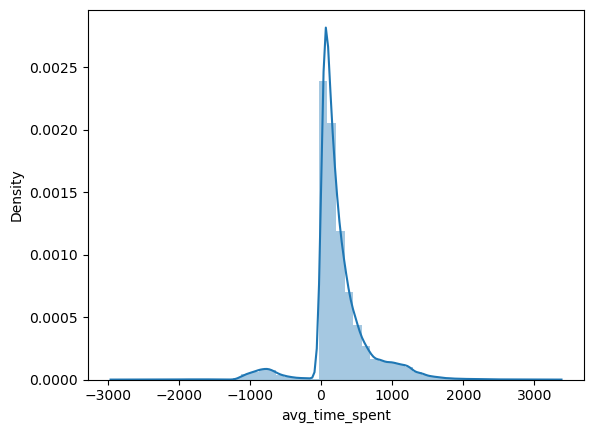

avg_transaction_value


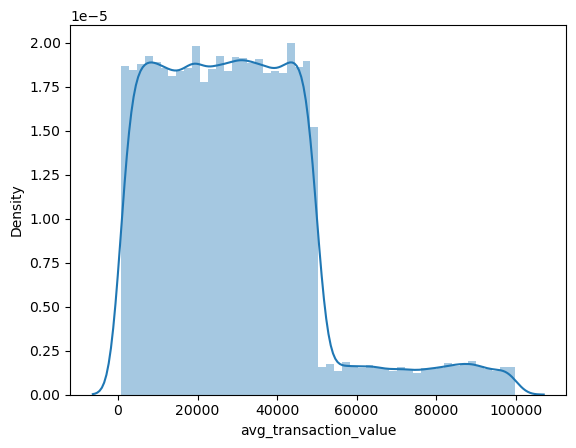

points_in_wallet


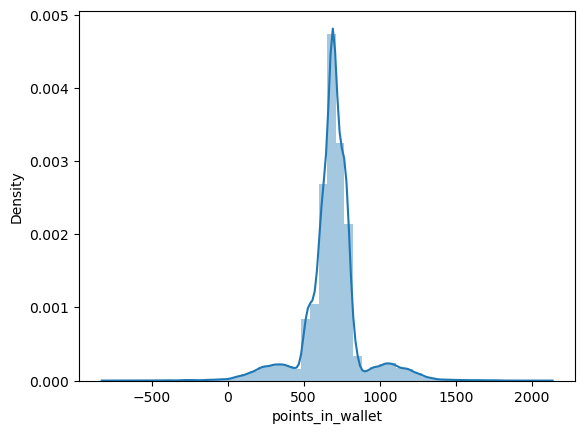

churn_risk_score


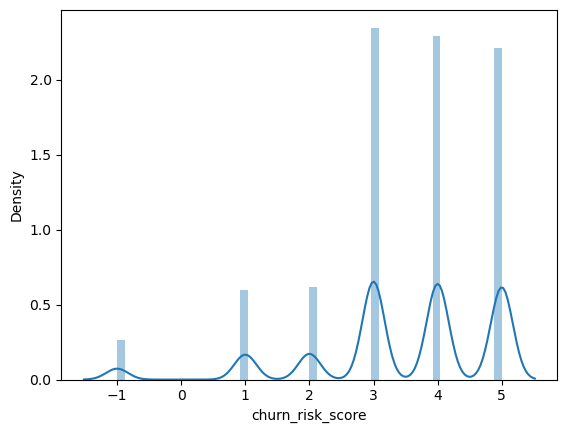

In [31]:
for cols in df[colnames]:
    print(cols)
    plt.figure()
    sns.distplot(df[cols])
    plt.show()

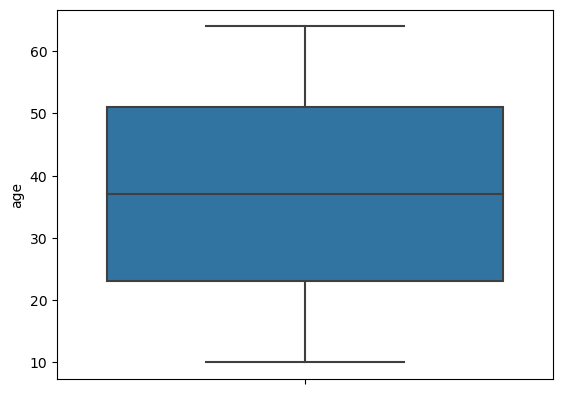

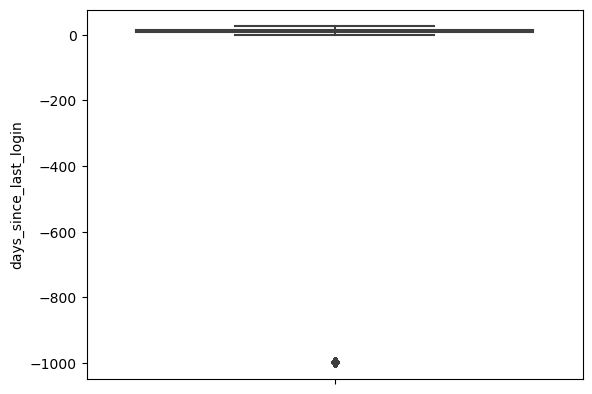

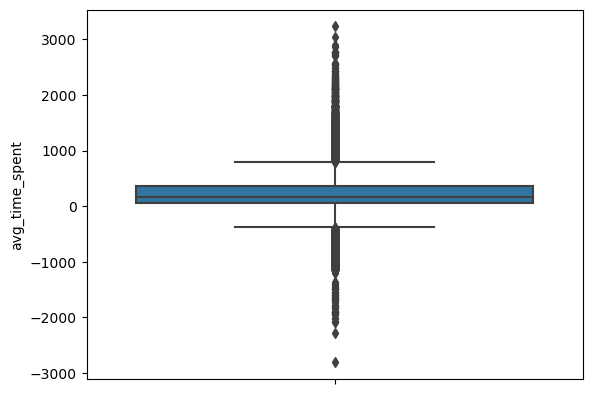

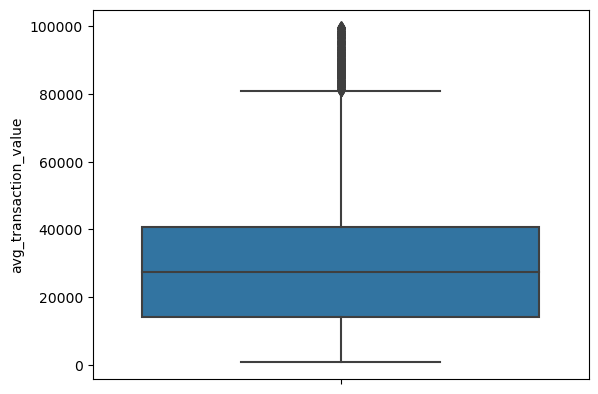

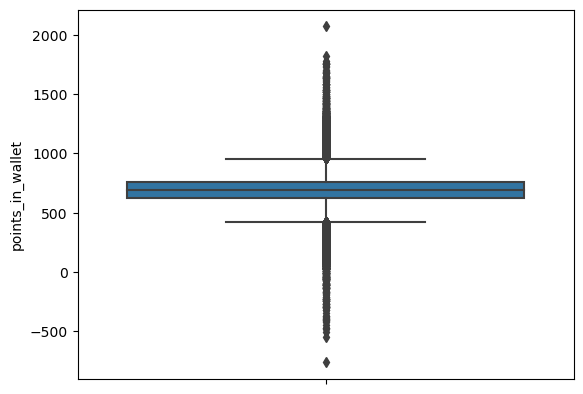

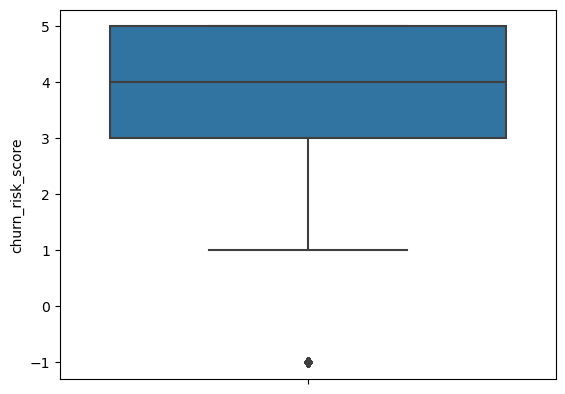

In [32]:
for i in df[colnames]:
    plt.figure()
    sns.boxplot(y=df[i])
    plt.show()
    

In [33]:
i= df[(df['avg_time_spent'] >= 675)|(df['avg_time_spent'] <= -200)].index
df.drop(i,axis=0,inplace=True)

df= df[df['avg_transaction_value']>=80000]

i = df[(df['points_in_wallet'] >= 800)|(df['points_in_wallet'] <= 630)].index
df.drop(i, inplace=True)


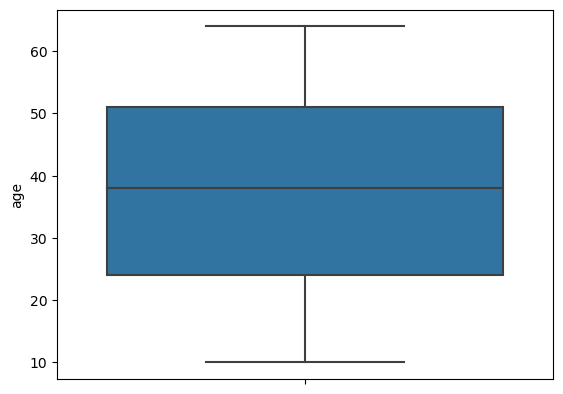

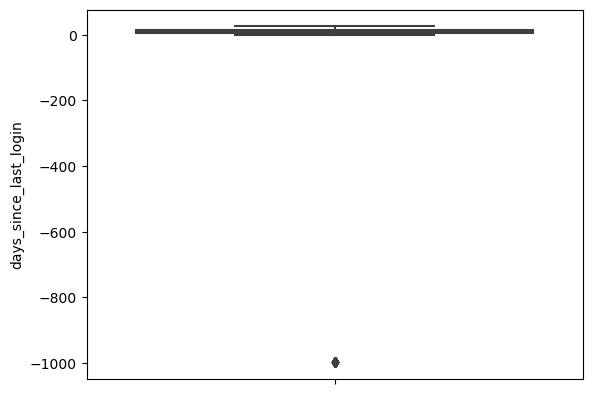

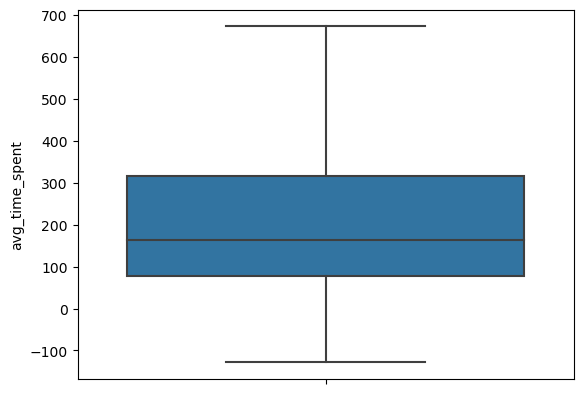

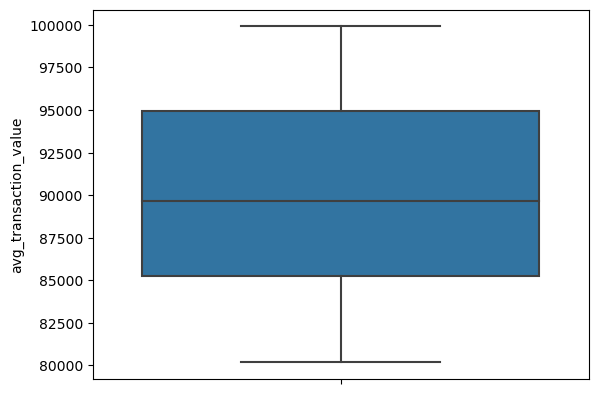

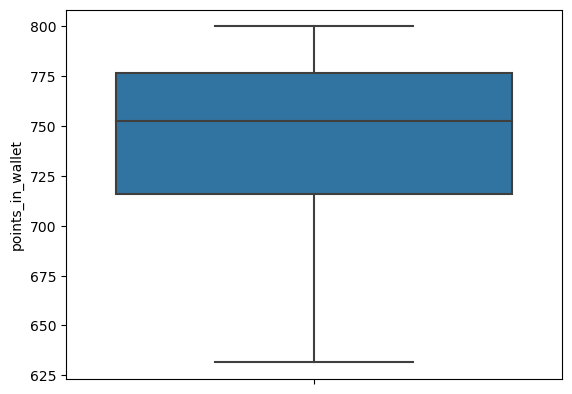

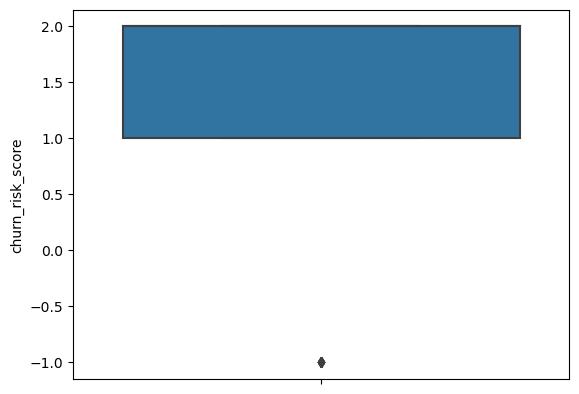

In [34]:
for i in df[colnames]:
    plt.figure()
    sns.boxplot(y=df[i])
    plt.show()

In [35]:
# for cols in df[colnames]:
#     print(cols)
#     plt.figure()
#     sns.distplot(df[cols])
#     plt.show()

In [36]:
sns.countplot(x="churn_risk_score",data=df)

<AxesSubplot:xlabel='churn_risk_score', ylabel='count'>

In [37]:
df.head()

,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score
48,Glendora Borel,30,M,TER02YR,City,Platinum Membership,?,CID4129,Gift Vouchers/Coupons,Smartphone,...,20,100.42,86433.91,Error,719.93,No,Yes,Yes,Reasonable Price,2
164,Ira Judd,27,F,00JB6QS,Town,Silver Membership,?,CID26757,Gift Vouchers/Coupons,?,...,2,484.45,83453.57,14.0,788.97,No,Yes,Yes,Reasonable Price,2
230,Barbie Hice,55,F,HLDJORJ,City,Gold Membership,No,xxxxxxxx,Without Offers,Smartphone,...,12,291.94,97643.81,5.0,713.99,Yes,Yes,No,User Friendly Website,2
332,Barbie Zwilling,13,M,DD3Q6FB,City,Silver Membership,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,...,4,150.97,85750.12,6.0,785.69,Yes,No,No,Quality Customer Care,2
418,Alpha Culligan,30,M,19ZN4CH,City,Premium Membership,Yes,CID17765,Credit/Debit Card Offers,Smartphone,...,17,512.86,84959.24,19.0,759.74,No,Yes,No,Reasonable Price,2


In [38]:
df["last_visit_time"].head()

48     14:13:01
164    03:23:24
230    11:24:45
332    07:23:53
418    07:59:50
Name: last_visit_time, dtype: object

In [39]:
df[["last_visit_time_hour","last_visit_time_min","last_visit_time_sec"]]=df["last_visit_time"].astype(str).str.split(":",expand=True).astype(int)

df.drop("last_visit_time",axis=1,inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 48 to 36966
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          649 non-null    object 
 1   age                           649 non-null    int64  
 2   gender                        649 non-null    object 
 3   security_no                   649 non-null    object 
 4   region_category               649 non-null    object 
 5   membership_category           649 non-null    object 
 6   joined_through_referral       649 non-null    object 
 7   referral_id                   649 non-null    object 
 8   preferred_offer_types         649 non-null    object 
 9   medium_of_operation           649 non-null    object 
 10  internet_option               649 non-null    object 
 11  days_since_last_login         649 non-null    int64  
 12  avg_time_spent                649 non-null    float64
 13  av

In [41]:
colss=df.select_dtypes(["object"]).columns
colss

Index(['Name', 'gender', 'security_no', 'region_category',
       'membership_category', 'joined_through_referral', 'referral_id',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'avg_frequency_login_days', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'feedback'],
      dtype='object')

In [42]:
from sklearn.preprocessing import OrdinalEncoder

ohe=OrdinalEncoder()
df[colss]=ohe.fit_transform(df[colss])
df.head()

,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,churn_risk_score,last_visit_time_hour,last_visit_time_min,last_visit_time_sec
48,193.0,30,1.0,521.0,0.0,1.0,0.0,131.0,1.0,3.0,...,38.0,719.93,0.0,1.0,1.0,2.0,2,14,13,1
164,228.0,27,0.0,0.0,1.0,3.0,0.0,69.0,1.0,0.0,...,13.0,788.97,0.0,1.0,1.0,2.0,2,3,23,24
230,46.0,55,0.0,313.0,0.0,0.0,1.0,255.0,2.0,3.0,...,33.0,713.99,1.0,1.0,0.0,3.0,2,11,24,45
332,49.0,13,1.0,228.0,0.0,3.0,1.0,255.0,1.0,2.0,...,34.0,785.69,1.0,0.0,0.0,1.0,2,7,23,53
418,20.0,30,1.0,28.0,0.0,2.0,2.0,28.0,0.0,3.0,...,18.0,759.74,0.0,1.0,0.0,2.0,2,7,59,50


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 649 entries, 48 to 36966
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          649 non-null    float64
 1   age                           649 non-null    int64  
 2   gender                        649 non-null    float64
 3   security_no                   649 non-null    float64
 4   region_category               649 non-null    float64
 5   membership_category           649 non-null    float64
 6   joined_through_referral       649 non-null    float64
 7   referral_id                   649 non-null    float64
 8   preferred_offer_types         649 non-null    float64
 9   medium_of_operation           649 non-null    float64
 10  internet_option               649 non-null    float64
 11  days_since_last_login         649 non-null    int64  
 12  avg_time_spent                649 non-null    float64
 13  av

In [44]:
df.columns

Index(['Name', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joined_through_referral', 'referral_id',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'feedback',
       'churn_risk_score', 'last_visit_time_hour', 'last_visit_time_min',
       'last_visit_time_sec'],
      dtype='object')

In [45]:
features=df.drop(['churn_risk_score'], axis=1)
features.head()

,Name,age,gender,security_no,region_category,membership_category,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,feedback,last_visit_time_hour,last_visit_time_min,last_visit_time_sec
48,193.0,30,1.0,521.0,0.0,1.0,0.0,131.0,1.0,3.0,...,86433.91,38.0,719.93,0.0,1.0,1.0,2.0,14,13,1
164,228.0,27,0.0,0.0,1.0,3.0,0.0,69.0,1.0,0.0,...,83453.57,13.0,788.97,0.0,1.0,1.0,2.0,3,23,24
230,46.0,55,0.0,313.0,0.0,0.0,1.0,255.0,2.0,3.0,...,97643.81,33.0,713.99,1.0,1.0,0.0,3.0,11,24,45
332,49.0,13,1.0,228.0,0.0,3.0,1.0,255.0,1.0,2.0,...,85750.12,34.0,785.69,1.0,0.0,0.0,1.0,7,23,53
418,20.0,30,1.0,28.0,0.0,2.0,2.0,28.0,0.0,3.0,...,84959.24,18.0,759.74,0.0,1.0,0.0,2.0,7,59,50


In [46]:
target=df["churn_risk_score"]
target

48       2
164      2
230      2
332      2
418      2
        ..
36708    1
36728    2
36738    2
36900    2
36966    2
Name: churn_risk_score, Length: 649, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,random_state=1,test_size=0.3,)

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=70,max_depth=15)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)


In [49]:
from sklearn.metrics import classification_report
tr=rf.score(xtrain,ytrain)
te=rf.score(xtest,ytest)
print(f"Training accuracy :{tr}\nTesting accuracy :{te}\n")
print(f"Clasification report :\n",classification_report(ytest,ypred))

Training accuracy :1.0
Testing accuracy :0.7282051282051282

Clasification report :
               precision    recall  f1-score   support

           1       0.62      0.44      0.51        64
           2       0.76      0.87      0.81       131

    accuracy                           0.73       195
   macro avg       0.69      0.65      0.66       195
weighted avg       0.71      0.73      0.71       195



In [50]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier()
dtr.fit(xtrain,ytrain)
ypred=dtr.predict(xtest)

In [51]:
tr=rf.score(xtrain,ytrain)
te=rf.score(xtest,ytest)
print(f"Training accuracy :{tr}\nTesting accuracy :{te}\n")
print(f"Clasification report :\n",classification_report(ytest,ypred))

Training accuracy :1.0
Testing accuracy :0.7282051282051282

Clasification report :
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           1       0.57      0.56      0.57        64
           2       0.79      0.78      0.78       131

    accuracy                           0.71       195
   macro avg       0.45      0.45      0.45       195
weighted avg       0.72      0.71      0.71       195



In [52]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x_sample,y_sample=ros.fit_resample(xtrain,ytrain)



In [53]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_sample,y_sample,random_state=1,test_size=0.3,)

In [54]:
rf=RandomForestClassifier(n_estimators=70,max_depth=15)
rf.fit(xtrain,ytrain)
ypred=rf.predict(xtest)

tr=rf.score(xtrain,ytrain)
te=rf.score(xtest,ytest)
print(f"Training accuracy :{tr}\nTesting accuracy :{te}\n")
print(f"Clasification report :\n",classification_report(ytest,ypred))

Training accuracy :1.0
Testing accuracy :0.8199233716475096

Clasification report :
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00        87
           1       0.74      0.75      0.74        91
           2       0.72      0.71      0.72        83

    accuracy                           0.82       261
   macro avg       0.82      0.82      0.82       261
weighted avg       0.82      0.82      0.82       261



In [55]:
dtr=DecisionTreeClassifier()
dtr.fit(xtrain,ytrain)
ypred=dtr.predict(xtest)

tr=dtr.score(xtrain,ytrain)
te=dtr.score(xtest,ytest)
print(f"Training accuracy :{tr}\nTesting accuracy :{te}\n")
print(f"Clasification report :\n",classification_report(ytest,ypred))

Training accuracy :1.0
Testing accuracy :0.8275862068965517

Clasification report :
               precision    recall  f1-score   support

          -1       0.92      1.00      0.96        87
           1       0.78      0.77      0.77        91
           2       0.78      0.71      0.74        83

    accuracy                           0.83       261
   macro avg       0.82      0.83      0.82       261
weighted avg       0.82      0.83      0.82       261

